In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
df1=pd.read_csv('Loan 1.csv')
df2=pd.read_csv('Loan 2.csv')


In [113]:
df1.isnull().sum()

Customer ID                       0
Name                              0
Gender                           31
Age                               0
Income (USD)                    750
Income Stability                813
Profession                        0
Type of Employment             4689
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)      83
Expense Type 1                    0
Expense Type 2                    0
Dependents                     1142
Credit Score                    743
No. of Defaults                   0
Has Active Credit Card         1076
Property ID                       0
Property Age                    892
Property Type                     0
Property Location               160
Co-Applicant                      0
Property Price                    0
dtype: int64

In [114]:
df2.isnull().sum()

Customer ID                       0
Name                              0
Gender                           53
Age                               0
Income (USD)                   4576
Income Stability               1683
Profession                        0
Type of Employment             7270
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     172
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card         1566
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location               356
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64

In [115]:
df = pd.concat([df1, df2], ignore_index=True)
duplicates = df[df.duplicated(subset=['Customer ID'], keep=False)]
print(duplicates)
df.isnull().sum()

Empty DataFrame
Columns: [Customer ID, Name, Gender, Age, Income (USD), Income Stability, Profession, Type of Employment, Location, Loan Amount Request (USD), Current Loan Expenses (USD), Expense Type 1, Expense Type 2, Dependents, Credit Score, No. of Defaults, Has Active Credit Card, Property ID, Property Age, Property Type, Property Location, Co-Applicant, Property Price, Loan Sanction Amount (USD)]
Index: []

[0 rows x 24 columns]


Customer ID                        0
Name                               0
Gender                            84
Age                                0
Income (USD)                    5326
Income Stability                2496
Profession                         0
Type of Employment             11959
Location                           0
Loan Amount Request (USD)          0
Current Loan Expenses (USD)      255
Expense Type 1                     0
Expense Type 2                     0
Dependents                      3635
Credit Score                    2446
No. of Defaults                    0
Has Active Credit Card          2642
Property ID                        0
Property Age                    5742
Property Type                      0
Property Location                516
Co-Applicant                       0
Property Price                     0
Loan Sanction Amount (USD)     20340
dtype: int64

In [116]:
#df = df.drop('Loan Sanction Amount (USD)', axis=1, errors='ignore')
#df.isnull().sum()

In [117]:
df['Profession'].unique()

array(['Commercial associate', 'Working', 'Pensioner', 'State servant',
       'Unemployed', 'Maternity leave', 'Student', 'Businessman'],
      dtype=object)

In [118]:
df['Income Stability'].unique()

array(['Low', 'High', nan], dtype=object)

In [119]:
conditions=[
    (df['Income Stability'].notnull()),
    (df['Income Stability'].isnull())&(df['Profession']=='Commercial associate'),#Low
    (df['Income Stability'].isnull())&(df['Profession']=='Working'),#Low
    (df['Income Stability'].isnull())&(df['Profession']=='Pensioner'),#High
    (df['Income Stability'].isnull())&(df['Profession']=='State servant'),#Low
    (df['Income Stability'].isnull())&(df['Profession']=='Unemployed'),#Low
    (df['Income Stability'].isnull())&(df['Profession']=='Maternity leave'),#Low
    (df['Income Stability'].isnull())&(df['Profession']=='Student'),#Low
    (df['Income Stability'].isnull())&(df['Profession']=='Businessman')#Low    
]

values=[
    df['Income Stability'],
    'Low',
    'Low',
    'High',
    'Low',
    'Low',
    'Low',
    'Low',
    'High'
]
df['Income Stability'] = np.select(conditions, values, default='Unknown')
df['Income Stability'].isnull().sum()

0

In [120]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df.isnull().sum()

Customer ID                        0
Name                               0
Gender                             0
Age                                0
Income (USD)                    5326
Income Stability                   0
Profession                         0
Type of Employment             11959
Location                           0
Loan Amount Request (USD)          0
Current Loan Expenses (USD)      255
Expense Type 1                     0
Expense Type 2                     0
Dependents                      3635
Credit Score                    2446
No. of Defaults                    0
Has Active Credit Card          2642
Property ID                        0
Property Age                    5742
Property Type                      0
Property Location                516
Co-Applicant                       0
Property Price                     0
Loan Sanction Amount (USD)     20340
dtype: int64

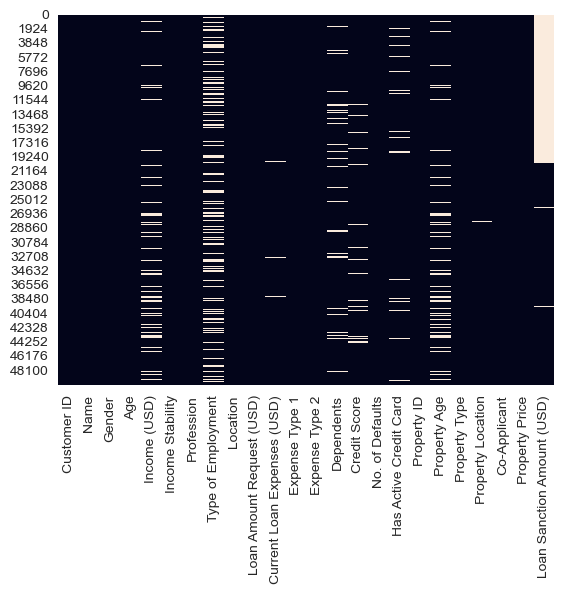

In [121]:
sns.heatmap(df.isnull(), cbar=False)
plt.show()


In [122]:
df['Income (USD)'].fillna(df['Income (USD)'].mean(), inplace=True)
df.isnull().sum()

Customer ID                        0
Name                               0
Gender                             0
Age                                0
Income (USD)                       0
Income Stability                   0
Profession                         0
Type of Employment             11959
Location                           0
Loan Amount Request (USD)          0
Current Loan Expenses (USD)      255
Expense Type 1                     0
Expense Type 2                     0
Dependents                      3635
Credit Score                    2446
No. of Defaults                    0
Has Active Credit Card          2642
Property ID                        0
Property Age                    5742
Property Type                      0
Property Location                516
Co-Applicant                       0
Property Price                     0
Loan Sanction Amount (USD)     20340
dtype: int64

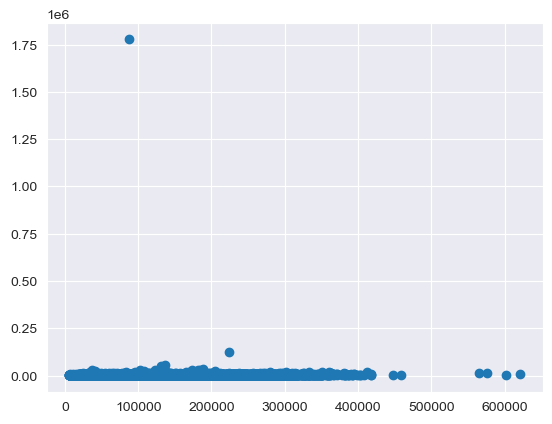

In [123]:
plt.scatter(df['Loan Amount Request (USD)'],df['Income (USD)'])

In [124]:
df['Dependents'].unique()
#df['Dependents'].isnull().sum()

array([ 2.,  3., nan,  1.,  4.,  5.,  6.,  7., 13., 10.,  8., 14.])

In [125]:
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

In [126]:
mean=df['Credit Score'].mean()
median=df['Credit Score'].mean()
print(mean,median)

739.4545775329099 739.4545775329099


In [127]:
df['Credit Score'].fillna(df['Credit Score'].mean(), inplace=True)
df.isnull().sum()

Customer ID                        0
Name                               0
Gender                             0
Age                                0
Income (USD)                       0
Income Stability                   0
Profession                         0
Type of Employment             11959
Location                           0
Loan Amount Request (USD)          0
Current Loan Expenses (USD)      255
Expense Type 1                     0
Expense Type 2                     0
Dependents                         0
Credit Score                       0
No. of Defaults                    0
Has Active Credit Card          2642
Property ID                        0
Property Age                    5742
Property Type                      0
Property Location                516
Co-Applicant                       0
Property Price                     0
Loan Sanction Amount (USD)     20340
dtype: int64

In [128]:
mode=df['Has Active Credit Card'].mode()
print(mode)

0    Active
Name: Has Active Credit Card, dtype: object


In [129]:
df['Has Active Credit Card'].fillna(df['Has Active Credit Card'].mode()[0], inplace=True)
df.isnull().sum()

Customer ID                        0
Name                               0
Gender                             0
Age                                0
Income (USD)                       0
Income Stability                   0
Profession                         0
Type of Employment             11959
Location                           0
Loan Amount Request (USD)          0
Current Loan Expenses (USD)      255
Expense Type 1                     0
Expense Type 2                     0
Dependents                         0
Credit Score                       0
No. of Defaults                    0
Has Active Credit Card             0
Property ID                        0
Property Age                    5742
Property Type                      0
Property Location                516
Co-Applicant                       0
Property Price                     0
Loan Sanction Amount (USD)     20340
dtype: int64

In [130]:
# Property age in years
print(df['Property Age'].head())

0    03-07-1909
1    29-03-1903
2    19-06-1903
3    30-09-1903
4    22-04-1905
Name: Property Age, dtype: object


In [132]:
df.isnull().sum()

Customer ID                        0
Name                               0
Gender                             0
Age                                0
Income (USD)                       0
Income Stability                   0
Profession                         0
Type of Employment             11959
Location                           0
Loan Amount Request (USD)          0
Current Loan Expenses (USD)      255
Expense Type 1                     0
Expense Type 2                     0
Dependents                         0
Credit Score                       0
No. of Defaults                    0
Has Active Credit Card             0
Property ID                        0
Property Age                    5742
Property Type                      0
Property Location                516
Co-Applicant                       0
Property Price                     0
Loan Sanction Amount (USD)     20340
dtype: int64

In [135]:
m=df['Property Age'].mode()
print(m)

0       15 July 1904
1    17 October 1905
Name: Property Age, dtype: object


In [141]:
df['Property Age'].fillna(df['Property Age'].mode()[0], inplace=True)
df['Property Location'].fillna(df['Property Location'].mode()[0],inplace=True)

In [142]:
df.isnull().sum()

Customer ID                        0
Name                               0
Gender                             0
Age                                0
Income (USD)                       0
Income Stability                   0
Profession                         0
Type of Employment             11959
Location                           0
Loan Amount Request (USD)          0
Current Loan Expenses (USD)      255
Expense Type 1                     0
Expense Type 2                     0
Dependents                         0
Credit Score                       0
No. of Defaults                    0
Has Active Credit Card             0
Property ID                        0
Property Age                       0
Property Type                      0
Property Location                  0
Co-Applicant                       0
Property Price                     0
Loan Sanction Amount (USD)     20340
dtype: int64

In [143]:
Sanction_matrix=df.corr()['Loan Sanction Amount (USD)']
print(Sanction_matrix)
Current_matrix=df.corr()['Current Loan Expenses (USD)']
print(Current_matrix)

ValueError: could not convert string to float: 'C-26247'

In [146]:
data = {
    'Customer ID': ['C-36995'],
    'Name': ['Frederica Shealy'],
    'Gender': ['F'],
    'Age': [56],
    'Income (USD)': [1933.05],
    'Income Stability': ['Low'],
    'Profession': ['Working'],
    'Type of Employment': ['Sales staff'],
    'Location': ['Semi-Urban'],
    'Loan Amount Request (USD)': [72809.58],
    'Current Loan Expenses (USD)': [241.08],
    'Expense Type 1': ['N'],
    'Expense Type 2': ['N'],
    'Dependents': [3],
    'Credit Score': [809.44],
    'No. of Defaults': [0],
    'Has Active Credit Card': [''],
    'Property ID': [746],
    'Property Age': ['16 April 1905'],
    'Property Type': [4],
    'Property Location': ['Rural'],
    'Co-Applicant': [1],
    'Property Price': [119933.46],
    'Loan Sanction Amount (USD)': [54607.18]
}

numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("\nCategorical Columns:")
print(categorical_columns)


Categorical Columns:
['Customer ID', 'Name', 'Gender', 'Income Stability', 'Profession', 'Type of Employment', 'Location', 'Expense Type 1', 'Expense Type 2', 'Has Active Credit Card', 'Property Age', 'Property Location', 'Co-Applicant', 'Property Price']


In [147]:
correlation_matrix = df[numerical_columns].corr()
print(correlation_matrix)

                                  Age  Income (USD)  \
Age                          1.000000     -0.009479   
Income (USD)                -0.009479      1.000000   
Loan Amount Request (USD)   -0.003654      0.060558   
Current Loan Expenses (USD) -0.022123      0.067751   
Dependents                  -0.074141      0.002956   
Credit Score                 0.125748      0.015478   
No. of Defaults             -0.003875     -0.002259   
Property ID                 -0.006785     -0.006331   
Property Type                0.002783      0.007498   
Loan Sanction Amount (USD)   0.008112      0.034880   

                             Loan Amount Request (USD)  \
Age                                          -0.003654   
Income (USD)                                  0.060558   
Loan Amount Request (USD)                     1.000000   
Current Loan Expenses (USD)                   0.712224   
Dependents                                    0.039112   
Credit Score                                  

In [158]:
Loan_Sanction_Amount_core=correlation_matrix['Loan Sanction Amount (USD)'].sort_values(ascending=False)
print(Loan_Sanction_Amount_core)

Loan Sanction Amount (USD)     1.000000
Loan Amount Request (USD)      0.726408
Current Loan Expenses (USD)    0.485070
Credit Score                   0.359661
Income (USD)                   0.034880
Age                            0.008112
Dependents                     0.004788
Property Type                  0.001984
No. of Defaults               -0.004330
Property ID                   -0.009751
Name: Loan Sanction Amount (USD), dtype: float64


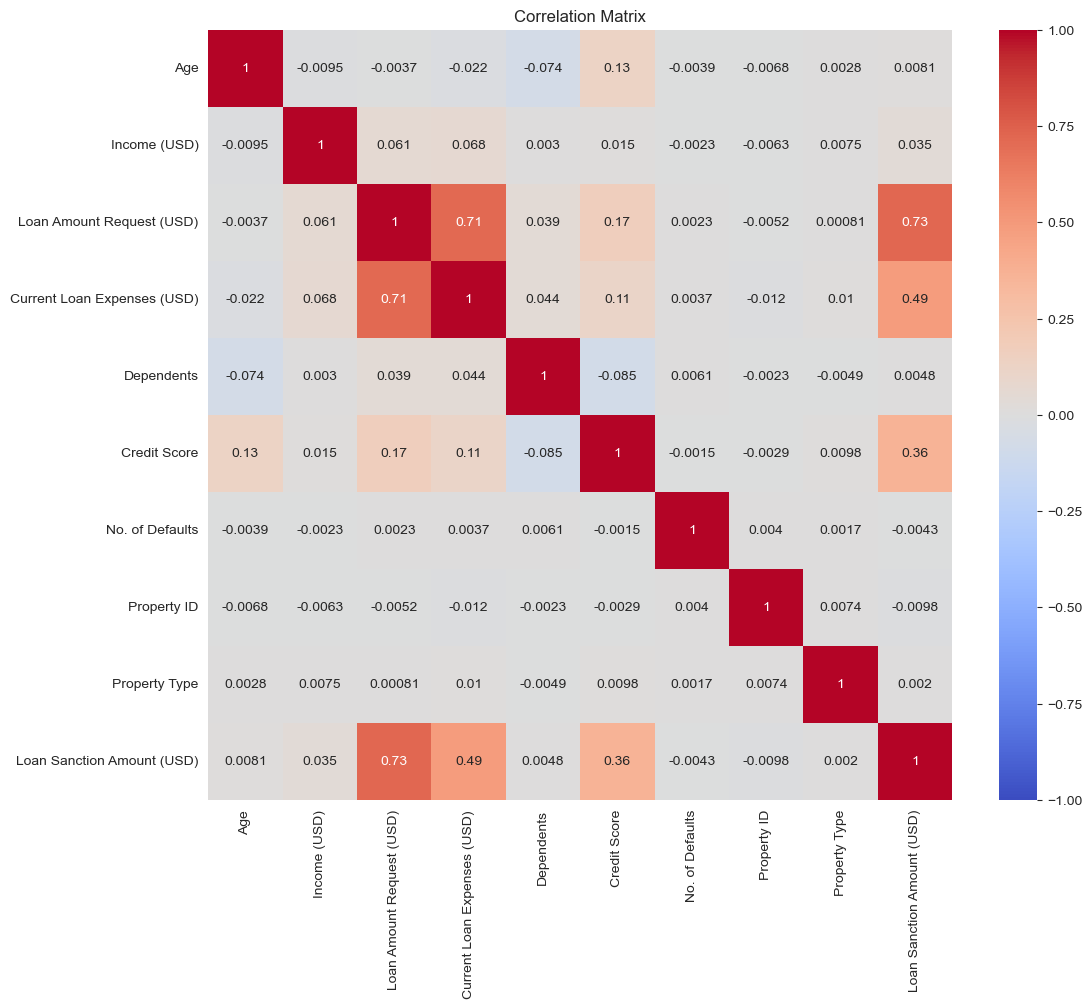

In [154]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [156]:
df['Type of Employment'].fillna(df['Type of Employment'].mode()[0],inplace=True)
df.isnull().sum()

Customer ID                        0
Name                               0
Gender                             0
Age                                0
Income (USD)                       0
Income Stability                   0
Profession                         0
Type of Employment                 0
Location                           0
Loan Amount Request (USD)          0
Current Loan Expenses (USD)      255
Expense Type 1                     0
Expense Type 2                     0
Dependents                         0
Credit Score                       0
No. of Defaults                    0
Has Active Credit Card             0
Property ID                        0
Property Age                       0
Property Type                      0
Property Location                  0
Co-Applicant                       0
Property Price                     0
Loan Sanction Amount (USD)     20340
dtype: int64

In [157]:
df['Current Loan Expenses (USD)'].fillna(df['Current Loan Expenses (USD)'].mean(), inplace=True)

In [159]:
Loan_Sanction_Amount_core=correlation_matrix['Loan Sanction Amount (USD)'].sort_values(ascending=False)
print(Loan_Sanction_Amount_core)

Loan Sanction Amount (USD)     1.000000
Loan Amount Request (USD)      0.726408
Current Loan Expenses (USD)    0.485070
Credit Score                   0.359661
Income (USD)                   0.034880
Age                            0.008112
Dependents                     0.004788
Property Type                  0.001984
No. of Defaults               -0.004330
Property ID                   -0.009751
Name: Loan Sanction Amount (USD), dtype: float64


In [160]:
from sklearn.impute import KNNImputer
based_co=df[['Loan Amount Request (USD)','Loan Sanction Amount (USD)','Current Loan Expenses (USD)']]
imputer = KNNImputer(n_neighbors=2)
imputer = imputer.fit_transform(based_co)
imputed_df=pd.DataFrame(imputer,columns=based_co.columns)

In [161]:
print(imputed_df)

       Loan Amount Request (USD)  Loan Sanction Amount (USD)  \
0                      137088.98                   54842.840   
1                      104771.59                   78593.350   
2                      176684.91                   70686.270   
3                       97009.18                   70327.715   
4                      109980.00                    -499.500   
...                          ...                         ...   
49995                   76657.90                   68992.110   
49996                   66595.14                   46616.600   
49997                   81410.08                   61057.560   
49998                  142524.10                   99766.870   
49999                  156290.54                  117217.900   

       Current Loan Expenses (USD)  
0                           396.72  
1                           463.76  
2                           493.15  
3                           446.15  
4                           370.10  
...      